In [1]:
import numpy
import matplotlib.pyplot as plt

In [18]:
def predator_prey_function(x, y, a, b, c, d):
    return (a*x - b*x*y, -c*y + d*x*y)

## Метод Эйлера не работает (как и дискретная модель в AnyLogic)

In [26]:
def euler(iterations, initial, step, a=2/3, b=4/3, c=1, d=1):
    x_val = [initial[0]]
    y_val = [initial[1]]
    t_val = [0]
    for i in range(iterations):
        delta = step*predator_prey_function(x_val[-1], y_val[-1], a, b, c, d)
        delta_x = delta[0]
        delta_y = delta[1]
        
        new_x = x_val[-1]+delta_x
        new_y = y_val[-1]+delta_y
        
        x_val.append(new_x)
        y_val.append(new_y)
        
        t_val.append(t_val[-1] + step)
    return t_val, x_val, y_val

In [23]:
iterations = 31
initial = (0.9, 0.9)
step = 1

In [27]:
euler(iterations, initial, step);

## Рунге-Кутта работает

In [36]:
def runge_kutta(iterations, initial, step, a=2/3, b=4/3, c=1, d=1):
    x_val = [initial[0]]
    y_val = [initial[1]]
    t_val = [0]
    for i in range(iterations):
        x1, y1 = predator_prey_function(x_val[-1], y_val[-1], a, b, c, d)
        x2, y2 = predator_prey_function(x_val[-1]+step*x1/2, y_val[-1]+step*y1/2, a, b, c, d)
        x3, y3 = predator_prey_function(x_val[-1]+step*x2/2, y_val[-1]+step*y2/2, a, b, c, d)
        x4, y4 = predator_prey_function(x_val[-1]+step*x3, y_val[-1]+step*y3, a, b, c, d)
        
        x_val.append(x_val[-1]+step*(x1+2*x2+2*x3+x4)/6)
        y_val.append(y_val[-1]+step*(y1+2*y2+2*y3+y4)/6)
        t_val.append(t_val[-1] + step)
    return t_val, x_val, y_val

In [38]:
time, prey, predator = runge_kutta(iterations, initial, step)

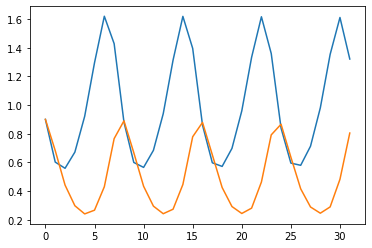

In [39]:
plt.plot(time, prey)
plt.plot(time, predator)